# MAPS

### Today we are going to use Python to make maps.  Many people use ARCgis or google maps etc.  But once you have data in python it is nice to be able to make maps right there in python.  then if you have multiple parameters you could also make lots of maps quickly!  So we are going to try and make a map. 

### We are going to try and do two mapping libraries for two reasons.  This is a new notebook so lets see how it goes.  We will do

### 1. Basemap - Publication quality maps

### 2. Folium - Interactive web mapls

You might need to install folium an basemap.  Most likely just folium.  It is "easy" to install new libraries.  How I do it, is I google "conda install folium".  

you get to this website

https://anaconda.org/ioos/folium

then you copy and paste the text into your terminal on a mac or your anaconda prompt on a PC.  And if it runs you are set!

But you probably need to install basemap also.
https://anaconda.org/anaconda/basemap


As a warning.  I find the mapping libraries a little quirkier and buggier than the other libraries. So you will need to be patient and look things up but the rewards are easy professional looking maps of your data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#NEW
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import folium
from IPython.display import HTML
from IPython.display import IFrame

from mpl_toolkits.basemap import Basemap

%matplotlib inline

ModuleNotFoundError: No module named 'folium'

## Make a basemap

Here is the simplest version using all defaults

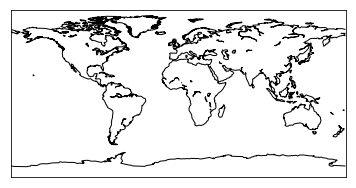

In [2]:
m = Basemap()
m.drawcoastlines()


Now you can add our fig and ax notation.

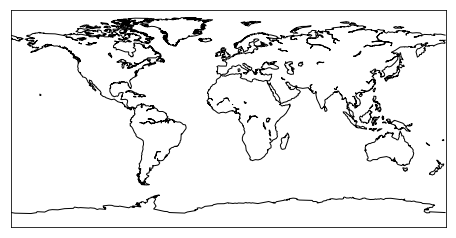

In [3]:
fig,ax=plt.subplots()
fig.set_size_inches(8,4)

m = Basemap(ax=ax)
m.drawcoastlines()

In basemap you first turn on your map with the basemap call and then you add things to it with the m. notation.   the first thing you need to do is determine your projection.  Since paper is flat and the earth is round their is no perfect projection.  Each has an error in shape or size somewhere.  Here are all the projections.  https://matplotlib.org/basemap/users/mapsetup.html

The example above is teh default which is cyl, or Cylindrical Equidistant projection, also known as Equirectangular projection or Plate Carrée. We will add it explicitly.  Once you do a projection you sometimes needs more keywords

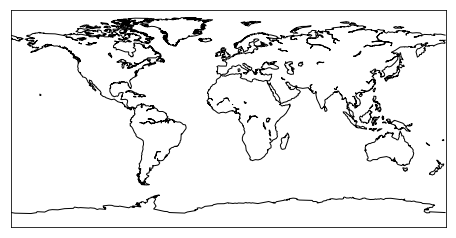

In [4]:
fig,ax=plt.subplots()
fig.set_size_inches(8,4)

m = Basemap(projection='cyl',ax=ax)
m.drawcoastlines()

Here are the keywords we can use.  Lets see some
https://matplotlib.org/basemap/api/basemap_api.html
Lets first change the center of the map by changing lon_0 to 180

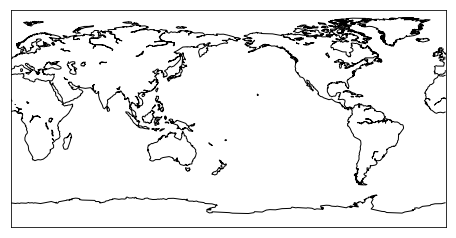

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(8,4)

m = Basemap(projection='cyl',lon_0=180,ax=ax)
m.drawcoastlines()

Now you can specify the size of the map by using corners.  and I made it course resolution. Here is the wording on resolution

	resolution of boundary database to use. Can be c (crude), l (low), i (intermediate), h (high), f (full) or None. If None, no boundary data will be read in (and class methods such as drawcoastlines will raise an if invoked). Resolution drops off by roughly 80% between datasets. Higher res datasets are much slower to draw. Default c. Coastline data is from the GSHHS (http://www.soest.hawaii.edu/wessel/gshhs/gshhs.html). State, country and river datasets from the Generic Mapping Tools (http://gmt.soest.hawaii.edu).
    
   Corners are lower left, upper right in both lat and long.  Lets try to get the us and center on it. You lose the lon_0 because you are giving a box.   
   
   Remember.  Latitute and Longitude.  Here is a picture.  (no need to plot this.  Just for reference as I always forget)

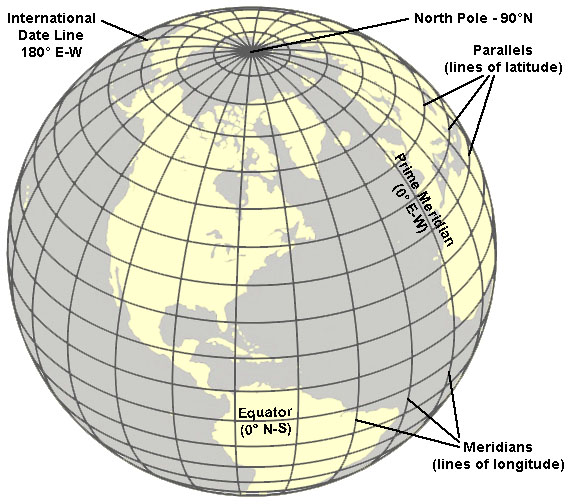

In [19]:
from IPython.display import Image
Image('globe.jpg')

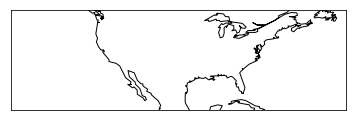

In [6]:
fig,ax=plt.subplots()
#fig.set_size_inches(8,4)

m = Basemap(projection='cyl',lon_0=90,ax=ax,\
           llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-150,urcrnrlon=-50,resolution='c')
m.drawcoastlines()

But we are missing country borders!  if you type m. and then tab you cae see what you can add! 

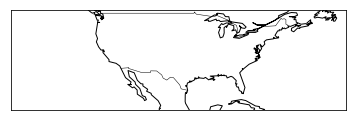

In [7]:
fig,ax=plt.subplots()

m = Basemap(projection='cyl',lon_0=90,ax=ax,\
           llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-150,urcrnrlon=-50,resolution='c')
m.drawcoastlines()
m.drawcountries()

You can also draw states in the US

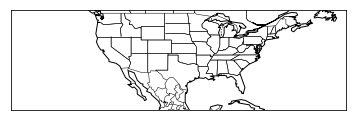

In [8]:
fig,ax=plt.subplots()

m = Basemap(projection='cyl',lon_0=90,ax=ax,\
           llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-150,urcrnrlon=-50,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

let's try a different projection!  Something like Robinson is a common one.  https://matplotlib.org/basemap/users/mapsetup.html

this projection requires a lon_0 else you will get an error

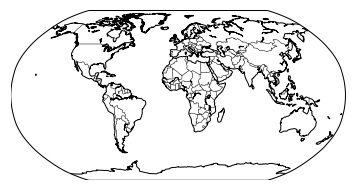

In [9]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()

### Can you choose a new projection and make it work?

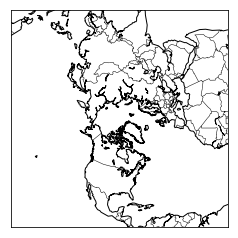

### We can make our maps look better.  
One way is to make the oceans blue and the land green.  You do this by m.fillcontinents and m.drawmapboundary with fill.  

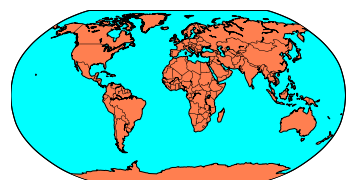

In [10]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

Next you can add you lat and lon lines.  Use drawparalls and drawmeridians.  

{-180.0: ([<matplotlib.lines.Line2D at 0x1f2e54dafd0>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x1f2e5458470>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x1f2e5458898>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x1f2e5458cc0>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x1f2e54eb128>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x1f2e54eb550>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x1f2e54eb978>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x1f2e54ebda0>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x1f2e56b4208>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x1f2e56b4630>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x1f2e56b4a58>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x1f2e56b4e80>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x1f2e56bc2e8>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x1f2e56bc710>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x1f2e56bcb38>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x1f2e56bcf60>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x1

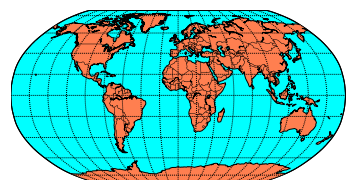

In [11]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

This is a nice looking map but they have other fills that people use.  You could use bluemarble instead. This doesn't look good zoomed in though

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{-180.0: ([<matplotlib.lines.Line2D at 0x1f2e55854e0>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x1f2e5585940>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x1f2e5585d68>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x1f2e55731d0>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x1f2e55735f8>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x1f2e5573a20>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x1f2e5573e48>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x1f2e55862b0>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x1f2e55866d8>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x1f2e5586b00>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x1f2e5586f28>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x1f2e55a0390>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x1f2e55a07b8>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x1f2e55a0be0>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x1f2e55a0fd0>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x1f28a6f0470>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x1

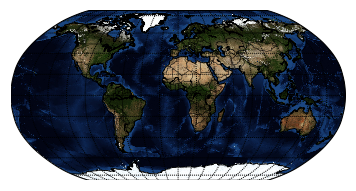

In [12]:
fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.bluemarble()
m.drawcoastlines()
m.drawcountries()

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

You can also add maps from ESRI which does ARCGis.  https://basemaptutorial.readthedocs.io/en/latest/backgrounds.html#arcgisimage

This is very sensitive to the projection! Be careful. 

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-150.0,20.0,-50.00000000000001,50.00000000000001&bboxSR=4326&imageSR=4326&size=1500,450&dpi=96&format=png32&transparent=true&f=image


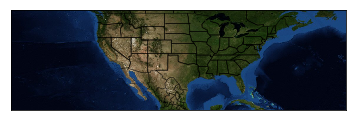

In [13]:
fig,ax=plt.subplots()

m=Basemap(projection='cyl',llcrnrlon=-150,llcrnrlat=20,urcrnrlon=-50,urcrnrlat=50)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

m.drawcountries()
m.drawstates()

### Now you should be good at making a map and turning it on with some boundaries.  

I am going to make a file of the CO2 Sampling locations and try to plot them. 

http://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations

Let's make a world map and add the points.  So read the data, and make a world map to begin.  The data are on the class blog.

{-180.0: ([<matplotlib.lines.Line2D at 0x1f280284400>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x1f280284860>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x1f280284c88>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x1f28028b0f0>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x1f28028b518>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x1f28028b940>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x1f28028bd68>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x1f2802931d0>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x1f2802935f8>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x1f280293a20>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x1f280293e48>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x1f28029c2b0>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x1f28029c6d8>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x1f28029cb00>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x1f28029cf28>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x1f2802a6390>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x1

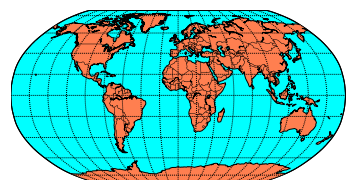

In [14]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

## Now we can add the points as scatter.  But first you have to convert the lat long to map/page coordinates.  

This is weird.  Just go with it.  You take the lat lon and you pass it into you m or basemap instance and it converts.  But remember lat long is really y,x.

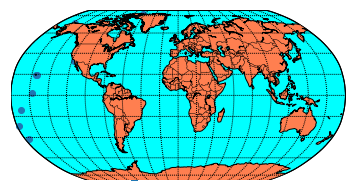

In [15]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y)

NICE!   But some Data is missing.  You need to add a zorder call to the scatter to bring it to the front.  Add zorder=10 and this brings scatter to the front.

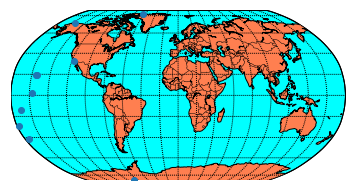

In [16]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10)

Now can you center it on the US to make it look better?

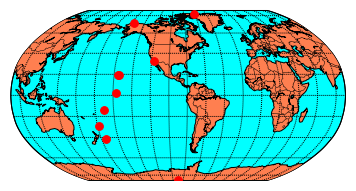

the next thing you will do is label points.  this is a bit of a pain.  But subtle and you already know all the steps!  Lets walk through it.  First do you remember adding text to your graphs with a bounding box?  We will do that. But we need to for loop through our data row by row to make it work.  You use iterrows.  https://stackoverflow.com/questions/23145928/python-and-pandas-how-to-access-a-column-using-iterrows  Let's try to learn itterows.  Lets go through it for df.

In [17]:
for index,row in df.iterrows():
    print (index,row)

0 StationName    Alert, NWT, Canada
StationCode                   ALT
Latitude                     82.3
Longitude                   -62.3
Elevation                     210
Dates              1985 - present
Name: 0, dtype: object
1 StationName    Point Barrow, Alaska
StationCode                     PTB
Latitude                       71.3
Longitude                    -156.6
Elevation                        11
Dates                1961 - present
Name: 1, dtype: object
2 StationName    La Jolla Pier, California
StationCode                          LJO
Latitude                            32.9
Longitude                         -117.3
Elevation                             10
Dates                     1957 - present
Name: 2, dtype: object
3 StationName    Mauna Loa Observatory, Hawaii
StationCode                              MLO
Latitude                                19.5
Longitude                             -155.6
Elevation                               3397
Dates                         19

So it goes throught the data row by row. If you just want the Latitude.... two different ways.

In [18]:
for index,row in df.iterrows():
    print (row.Latitude,row['Latitude'])

82.3 82.3
71.3 71.3
32.9 32.9
19.5 19.5
19.5 19.5
2.0 2.0
-14.2 -14.2
-29.2 -29.2
-41.4 -41.4
-90.0 -90.0


How about the Longitude?

-62.3
-156.6
-117.3
-155.6
-154.8
-157.3
-170.6
-177.9
-174.9
-90.0


Now how about Longitude, Latitude, and Name

In [19]:
for index,row in df.iterrows():
    print (row.Latitude,row.Longitude,row.StationName)

82.3 -62.3 Alert, NWT, Canada
71.3 -156.6 Point Barrow, Alaska
32.9 -117.3 La Jolla Pier, California
19.5 -155.6 Mauna Loa Observatory, Hawaii
19.5 -154.8 Cape Kumukahi, Hawaii
2.0 -157.3 Christmas Island
-14.2 -170.6 American Samoa
-29.2 -177.9 Kermadec Island
-41.4 -174.9 Baring Head, New Zealand
-90.0 -90.0 South Pole


Now Lets bring back our bounding box and our props for its properties and add one text box at -180,0

Text(8.4934e+06,8.6155e+06,'This is crazy')

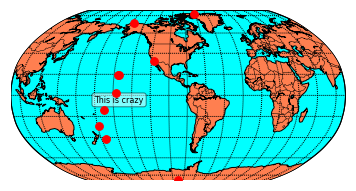

In [20]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
tx,ty=m(-180,0)
textstr='This is crazy'
ax.text(tx,ty,textstr,fontsize=8,verticalalignment='top',bbox=props)

Now put it all together.  Add your for loop and use the actual location and text like you did above

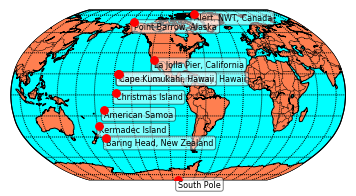

To clean mine up I changed the alpha to 0.7 or higher to make the background darker and not see through.  Then I subtracted some degress to the latitude to move the boxes over.  Then I made it a little bigger so we could see it! some boxes overlap. DO NOT SPEND TIME chasing down this problem.  It is fine for now and really hard to fix.

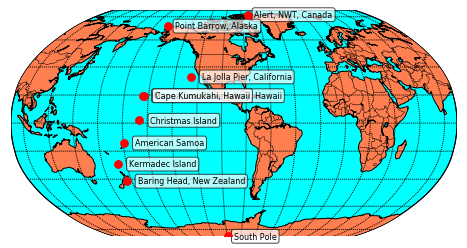

In [21]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,10)
m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values-9.0,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.7)
for index,row in df.iterrows():
    tx,ty=m(row.Longitude,row.Latitude)
    textstr=row.StationName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='center',horizontalalignment='left',bbox=props)

### You are in great shape able to put points from a file onto a map.  That is really nice.


### The next big thing you need to do is learn how to read in shape files and color in a shape file

First let's read in the blood lead data

In [22]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

In [23]:
dfBL.head()

State StateAbbrev  Population_less_than_72_months  \
0      Alabama          AL                          354230   
1      Arizona          AZ                          521310   
2   California          CA                         3037143   
3     Colorado          CO                          405720   
4  Connecticut          CT                          228774   

   NumberChildrenTested  TotalChildrenBLL  Perct10dl  
0                 21798               101   0.463345  
1                 47339                92   0.194343  
2                565397              1156   0.204458  
3                 16555                28   0.169133  
4                 68799               560   0.813965

Next I am going to just make a map of the US and use bluemarble to test it.

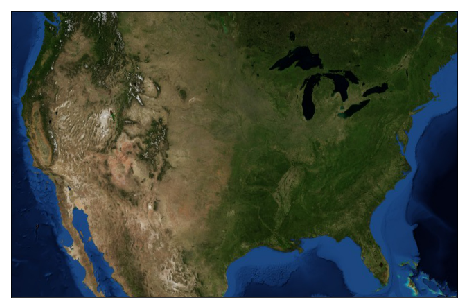

In [24]:
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)
m.bluemarble()


Now lets go and get a state shapefile

https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html

download the state shapefile

I downloaded the 5m state file

Now we can turn off bluemarble and show the shapefile.  Basemap is smart and draws the polygons for you!

I also have the data on the class webpage

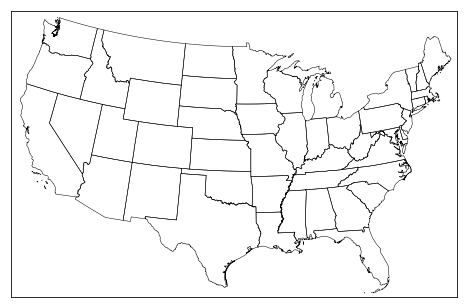

In [25]:
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

Can you download the congressional districts and map them? You have to figure out what the polygons are called!  They are called "District"

BUT what we want to do is color each state by its lead value!  So lets go back to the states.   We can loop through shp_info for each state and we can link it to the lead data we have.  So what we want to do is for each state plot the blood lead.  We will print the name and the lead.  For this you read your shape files.  Then the second name is what you call the state_info.  We just called it states and therefore you loop over states_info. Then you tell it to make a polygon using states.   

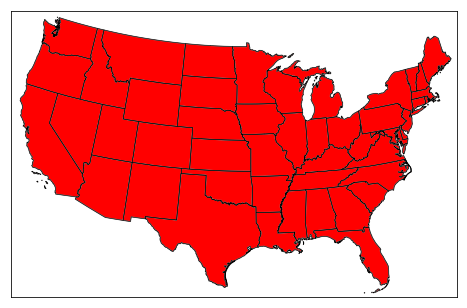

In [26]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    seg = m.states[count]
    poly = Polygon(seg, facecolor='red',edgecolor='gray')
    ax.add_patch(poly)

Now changes the states to dummy so you can see the critical parts.

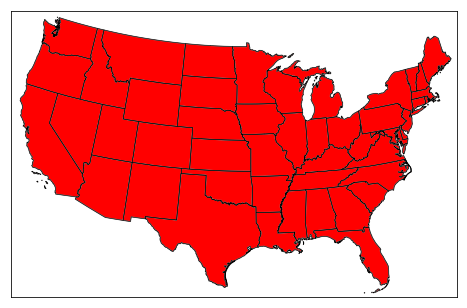

In [27]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','dummy',drawbounds=True)

for count,shape_dict in enumerate(m.dummy_info):
    seg = m.dummy[count]
    poly = Polygon(seg, facecolor='red',edgecolor='gray')
    ax.add_patch(poly)

Now set the color and if the state is New York make is a cool color.  The shape_dict['NAME'] gives you access to each state name.  So you can print them to see the names. And then set New york. I commented out the print but you can uncomment it to see what happens.  I also added an xkcd color for you.  https://xkcd.com/color/rgb/  https://blog.xkcd.com/2010/05/03/color-survey-results/

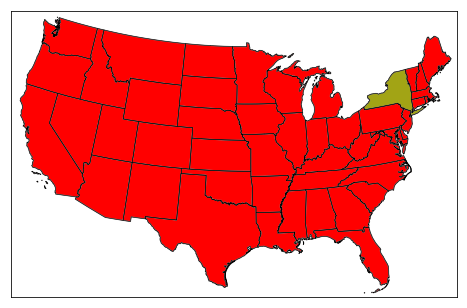

In [28]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','dummy',drawbounds=True)

for count,shape_dict in enumerate(m.dummy_info):
    # print shape_dict['NAME']
    if shape_dict['NAME']=='New York':
        color='xkcd:vomit'
    else:
        color='red'
    seg = m.dummy[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)
    

Can you set another state to another color?

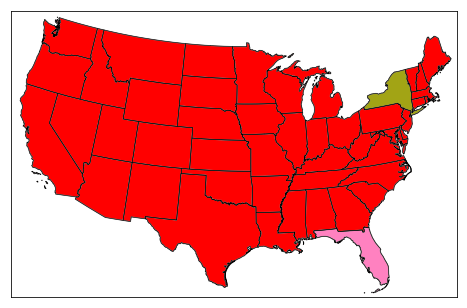

NOW Lets print the state name and the lead values.  But I am going to do a trick first and make sure we have data before we plot it by checking if the name is in our data.  You need to use .value to make it work

I have comments otherwise it will waste a lot of paper!  remove the comments and try


In [31]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    #if shape_dict['NAME'] in dfBL.State.values:
     #   print (shape_dict['NAME'],dfBL.Perct10dl[dfBL.State==shape_dict['NAME']])
    #else:
    #    print ('No data')

SyntaxError: unexpected EOF while parsing (<ipython-input-31-5156124c0426>, line 13)

Now make the states with no data gray and the states with data red.  

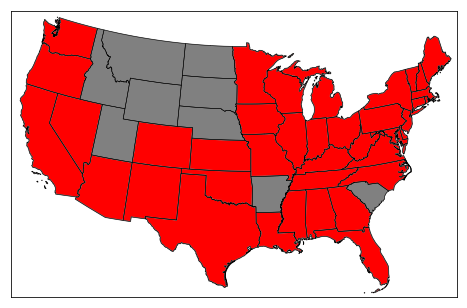

In [32]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    color='blue'
    if shape_dict['NAME'] in dfBL.State.values:
        color='red'
    else:
        color='gray'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

We are getting closer but now it gets a little weird.  We need to choose a color based on a value. if youy pass a value between 0 and 1 to a color map it passes back the rgb values. Remember there are a ton of color maps. https://matplotlib.org/examples/color/colormaps_reference.html  

This page sort of gives us the answer https://stackoverflow.com/questions/28144142/how-can-i-generate-a-colormap-array-from-a-simple-array-in-matplotlib


In [33]:
cmap=plt.cm.RdYlBu
print (cmap(2))

(0.6624375240292195, 0.014763552479815456, 0.1493271818531334, 1.0)


But you need to use hex colors so we need to convert rgb2hex to get a color to use.

In [34]:
print (rgb2hex(cmap(0.2)))

#f46d43


This means if we can convert our data to a numbner between 0 and 1 we could color it and plot it.  There is a classic way to scale your data.

(Value-Min)/(max-min)

You can either find or set the min and max.  I set them as sometimes you want to scale and scrunch the end colors.

For our lead I will set the vmin and vamx to 0.1 and 0.8 because of outliers.  Since we are using pandas we can make a new column of all the scaled values.


In [35]:
vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
dfBL.head()

State StateAbbrev  Population_less_than_72_months  \
0      Alabama          AL                          354230   
1      Arizona          AZ                          521310   
2   California          CA                         3037143   
3     Colorado          CO                          405720   
4  Connecticut          CT                          228774   

   NumberChildrenTested  TotalChildrenBLL  Perct10dl  PbScaled  
0                 21798               101   0.463345  0.519065  
1                 47339                92   0.194343  0.134776  
2                565397              1156   0.204458  0.149226  
3                 16555                28   0.169133  0.098762  
4                 68799               560   0.813965  1.019950

Now we can put our data together.  We can read it in.  And make a new column scaling it.  

In [36]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
print (dfBL.PbScaled[dfBL.State=='New York'])

26    1.162127
Name: PbScaled, dtype: float64


Now there is a quirk.  If we pass the scaled New york value to cmap and then pass it to rgb2hex we get an error.  You will get an error and it might not match mine!!! ERROR WARNING!

In [37]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)

rgb2hex(cmap(dfBL.PbScaled[dfBL.State=='New York']))


ValueError: Invalid RGBA argument: array([[0.19215686, 0.21176471, 0.58431373, 1.        ]])

The trouble is we are passing an array from pandas to rgb2hex which just wants three values and not an array.  Every once in a while a function can't handle an array.  See above how it says array in the error.  So you need to send it one item.  You can do this with item or with []  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.item.html and set it equal to color.

In [38]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)

color = rgb2hex(cmap(dfBL.PbScaled[dfBL.State=='New York'].item()))

print( color)

#313695


Now you should be able to put it all together!   Where we have New York substitute shape_dict['NAME'] and put all the parts together!

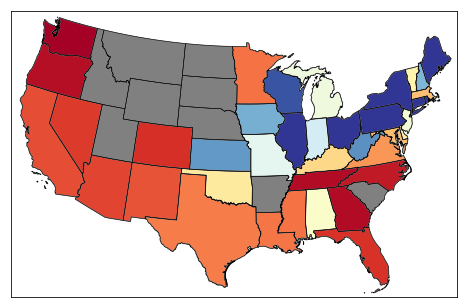

Two problems.

1. It is ugly
1. It needs a legend

First for the legend.  I learned it from here. 
https://stackoverflow.com/questions/43646097/add-colorbar-for-polygones-in-basemap-plot-of-us

It is a fourstep process
1.  use normalize to scale the colors from minimum to maximum values.  It is saying what the range is.
1.  setting the location with fig.add_axes.  You https://stackoverflow.com/questions/43326680/differences-between-add-axes-and-add-subplot  set the x,y, width and height.  
1.  pass the information to the ColorBase
1.  Give it a title
1.  ax.axis('off') just turns off the box.  See if you like it on or off.

(0.0, 4777416.5450312905, 0.0, 3067664.015853348)

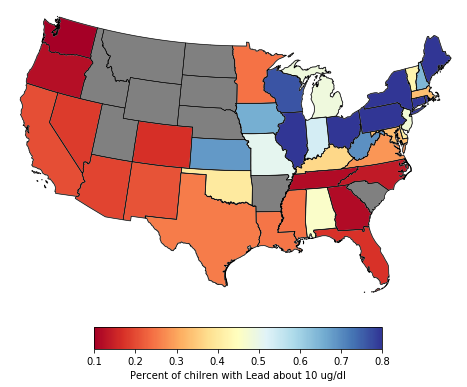

In [39]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
        color=rgb2hex(cmap(dfBL.PbScaled[dfBL.State==shape_dict['NAME']].item()))
    else:
        color='gray'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

cbar_title='Percent of chilren with Lead about 10 ug/dl'
norm = Normalize(vmin=vmin, vmax=vmax)
cax = fig.add_axes([0.27, 0.05, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel(cbar_title)   
ax.axis('off')

Now Lets choose a better color system.  I like one color for maps.  https://matplotlib.org/examples/color/colormaps_reference.html Like Blues.

Then I added hatches for the states with no data and made the color a lightgray.

Then I fixed the typos in the color bar title!

And it looks professional!

(0.0, 4777416.5450362042, 0.0, 3067664.0158503051)

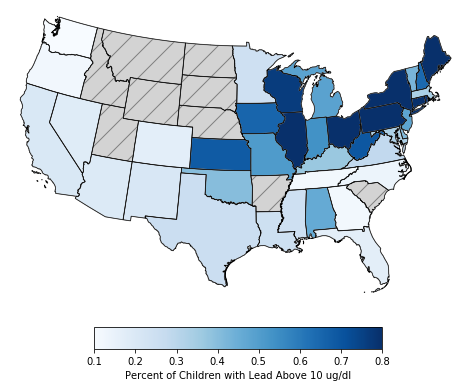

## You just made a professional looking map!!!

Now it is easy to change the map and make more data.  If you find state level data you should be set.  You can import and plot and be set.  It looks great.




## Folium
Now are are going to move on to folium and do very similar stuff but folium is for interactive mapping where you can place the map into a website or mail it to a friend.  Again, remember mapping is buggy.  But we will take our time and work through it.  
Here are some good sites for an overview
http://comet.lehman.cuny.edu/owen/teaching/datasci/choroplethLab.html

https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb

USE LOCAL PATHS!


The first basic parts are 
1.  A location
1.  Then you make a folium map
1.  Then you display the map.

In [40]:
location =[40.8106,-73.9630]
m = folium.Map(location=location)
m

But Lets try to add an icon to the map.  It is called a marker.  you add by using folium.Marker.  I also added zoom_start to say how big the map is

In [41]:
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=16)
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m

Amazing.  We put a point on our classroom and if you click the point it has a message!  I want to make the maps smaller.  The best way I did this was I save the map as an html file and then open the file with iframe.  But they don't print!  so I will comment out the lines and you can use them. It is weird.

In [43]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=16)
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)

Let's look at some things we can change.  We will go back to zoom_start=6 and try a few things.  

First we can change what the map looks like!  

https://deparkes.co.uk/2016/06/10/folium-map-tiles/

Here are some example tiles.  

If we do help(folium.Map) we will learn a lot more.

In [334]:
#help(folium.Map)

So lets see what happens if we add the keywork tile='StamenTerrain'

In [44]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=6,tiles='StamenTerrain')
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)

Try a terrain of your choice

You can change the icon and add symbols to it.  The quickstart http://folium.readthedocs.io/en/latest/quickstart.html and the help will give you more information.  

In [7]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
icon=folium.Icon(color='red',icon='info-sign',icon_color='blue')
m = folium.Map(location=location,zoom_start=6,tiles='StamenTerrain')
folium.Marker(location,popup='Wow This is our Room!',icon=icon).add_to(m)
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)

I want to make circular markers.  Because I think they look better on a map.  so lets look at the help

In [339]:
#help(folium.CircleMarker)

It looks like we need to pass
1.  location
1.  radius
1.  fill_color
1.  color
1.  fill_opacity
1.  popup

Lets try changing our icon to a circle

In [45]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=10,tiles='StamenToner')
folium.CircleMarker(location,radius=10,popup='Wow This is our Room!',color='red',fill_color='red').add_to(m)
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)

Can you guess what I am going to have us do??????

You know it is coming!

We will read in a file of locations and we are going to plot them!  

For this we will use the lead that we sampled in Brooklyn this past summer!  Look at this blog entry. http://blogs.ei.columbia.edu/2017/10/09/many-backyards-in-brooklyn-neighborhood-are-contaminated-with-high-levels-of-lead/

Do you remember the brooklyn public lead excel sheet? Lets load it! I updated the column names to make it easier

In [46]:
df=pd.read_excel('BrooklynPublicLead.xlsx')

In [47]:
df.head()

SampleNum sample_id      SubmissionDate   Latitude  Longitude  \
0        265  17BP9001 2017-06-21 22:56:00  40.716585 -73.955596   
1        266  17BP9002 2017-06-21 18:05:00  40.716212 -73.954560   
2        267  17BP9003 2017-06-21 18:05:00  40.716245 -73.954234   
3        268  17BP9004 2017-06-21 18:05:00  40.716487 -73.954213   
4        269  17BP9005 2017-06-21 18:05:00  40.716542 -73.955192   

   sample_gps.Altitude                                     descrip_other  \
0           -19.970294                                               NaN   
1           -67.265589  Near active construction site/ might be a school   
2           -28.343367                                               NaN   
3            -4.880463                                      Near garage    
4           -16.867952                                               NaN   

            Pb  
0   122.333333  
1    85.666667  
2    94.000000  
3    46.333333  
4  1414.333333

Using folium is sometimes easier!  One way is you just pass your latitude and longitude to the location which you pass to the map.  You don't have to worry about reversing them.  Can you use your iterrows to pass all the brooklyn lead locations and plot them on the map. 

In [48]:
df=pd.read_excel('BrooklynPublicLead.xlsx')
mapName='brooklynLocations.html'
location =[40.72,-73.95]
m = folium.Map(location=location,zoom_start=13)

for index,row in df.iterrows():
    location =[row.Latitude,row.Longitude]
    folium.CircleMarker(location,radius=3,color='red',fill_color='red'\
                        ,popup='Wow This is our Data!').add_to(m)
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)


Now lets make a great map.  Lets color code the points according to the blog.

<150 Green

150-400 yellow

400-1200 orange

\>1200 red

plus lets make the text say the information in 'descrip_other' and the lead value by using your fancy formating to make a text string and passing that with lead values without too many digits.

Doing the popup us also quirky. I had to serach for the answer.  
1.  make your popuptext.  I use the format notation.  say popuptext=
1.  Once you have your poputext you need to define your popup in folium 
popup = folium.Popup(popuptext, parse_html=True)
1.  then you can set popup=popup


In [49]:
df=pd.read_excel('BrooklynPublicLead.xlsx')
mapName='brooklynLocations.html'
location =[40.72,-73.95]
m = folium.Map(location=location,zoom_start=13)
color='red'
for index,row in df.iterrows():
    if row.Pb<150:
        color='green'
    elif row.Pb<400:
        color='yellow'
    elif row.Pb<1200:
        color='orange'
    elif row.Pb>=1200:
        color='red'
    else:
        color='gray' 
            
    popuptext='{} with a lead of {:.2f}'.format(row.descrip_other,row.Pb)
    location =[row.Latitude,row.Longitude]
    popup = folium.Popup(popuptext, parse_html=True)
    folium.CircleMarker(location,radius=3,color=color,fill_color=color,popup=popup).add_to(m)
    
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)

To do shapefiles in folium they call it chorpleth and use geojson files.  So it has its pluses and minuses.  to make a geojson file.  I went to https://mygeodata.cloud and I converted the shapefile to a geojson file. I have also been able to download some geojson files.

In [50]:
state_geo = r'cb_2016_us_state_5m/cb_2016_us_state_5m.geojson'

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data=state_geo
)
folium.LayerControl().add_to(m)

#m
m.save(outfile='states.html')

IFrame('states.html', width=700, height=350)

c:\users\bmaillou\folium-locate_control\folium\folium.py:431: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Now lets open the state lead data and try to fill it.  It is weird and I am not sure people will make it this far.  But you pass it a pandas dataframe and the two columns.  the one to match to the geojson files and the one to plot.  

In [51]:
dfBL=pd.read_excel('BloodLeadDataStateFolium.xlsx')
state_geo = r'cb_2016_us_state_5m/cb_2016_us_state_5m.geojson'

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data=state_geo,
    data=dfBL,
    columns=['State','Perct10dl'],
    key_on='feature.properties.NAME',
    fill_color='RdBu',
    fill_opacity=0.2
)
#m
m.save(outfile='states2.html')

IFrame('states2.html', width=700, height=350)

c:\users\bmaillou\folium-locate_control\folium\folium.py:431: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Answers

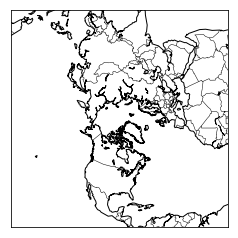

In [24]:
fig,ax=plt.subplots()

# for npstere the bouding lat is the outside of the map
# the lat_0 is what is at 6 o'clock
m = Basemap(projection='npstere',lon_0=270,boundinglat=10,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()

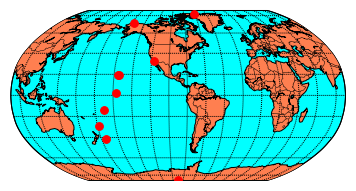

In [11]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

In [41]:
for index,row in df.iterrows():
    print row.Longitude

-62.3
-156.6
-117.3
-155.6
-154.8
-157.3
-170.6
-177.9
-174.9
-90.0


In [43]:
for index,row in df.iterrows():
    print row.Latitude,row.Longitude,row.StationName

82.3 -62.3 Alert, NWT, Canada
71.3 -156.6 Point Barrow, Alaska
32.9 -117.3 La Jolla Pier, California
19.5 -155.6 Mauna Loa Observatory, Hawaii
19.5 -154.8 Cape Kumukahi, Hawaii
2.0 -157.3 Christmas Island
-14.2 -170.6 American Samoa
-29.2 -177.9 Kermadec Island
-41.4 -174.9 Baring Head, New Zealand
-90.0 -90.0 South Pole


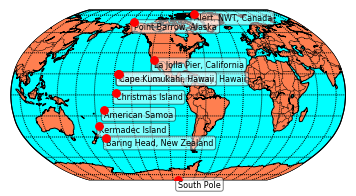

In [39]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()

m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
for index,row in df.iterrows():
    tx,ty=m(row.Longitude,row.Latitude)
    textstr=row.StationName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='top',bbox=props)

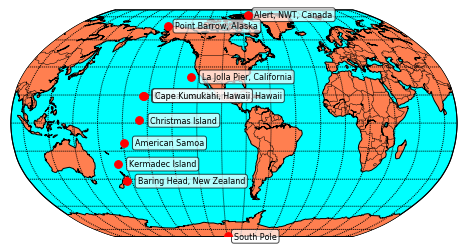

In [40]:
df=pd.read_excel('CO2Stations.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,10)
m = Basemap(projection='robin',lon_0=-90,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df.Longitude.values-9.0,df.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='red')

props=dict(boxstyle='round',facecolor='white',alpha=0.7)
for index,row in df.iterrows():
    tx,ty=m(row.Longitude,row.Latitude)
    textstr=row.StationName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='center',horizontalalignment='left',bbox=props)

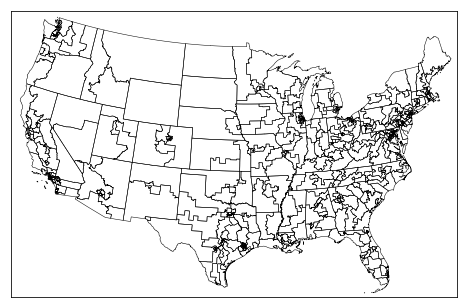

In [68]:
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('cb_2016_us_cd115_5m/cb_2016_us_cd115_5m','District',drawbounds=True)

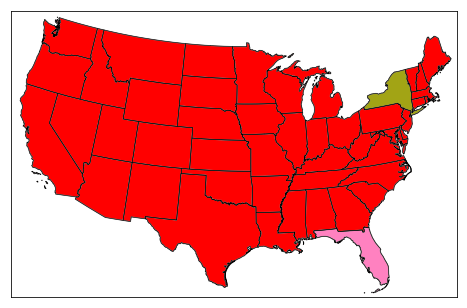

In [37]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','dummy',drawbounds=True)

for count,shape_dict in enumerate(m.dummy_info):
    # print shape_dict['NAME']
    if shape_dict['NAME']=='New York':
        color='xkcd:vomit'
    elif shape_dict['NAME']=='Florida':
        color='xkcd:pink'
    else:
        color='red'
    seg = m.dummy[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

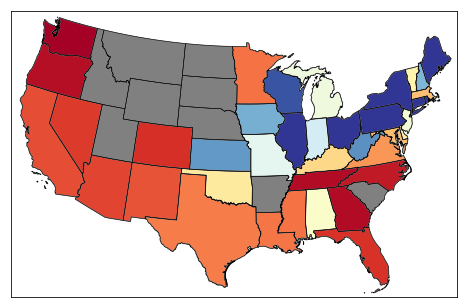

In [38]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
cmap=plt.cm.RdYlBu

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
        color=rgb2hex(cmap(dfBL.PbScaled[dfBL.State==shape_dict['NAME']].item()))
    else:
        color='gray'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

(0.0, 4777416.545031292, 0.0, 3067664.0158533505)

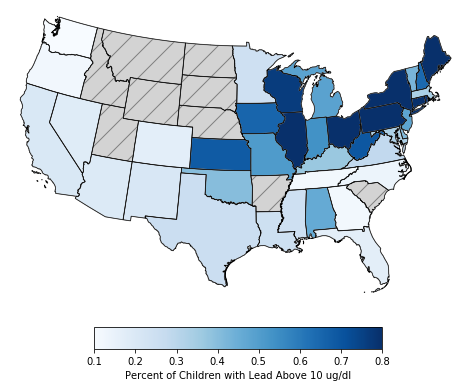

In [39]:
dfBL=pd.read_excel('BloodLeadData.xlsx')

vmin=0.1
vmax=0.8
dfBL['PbScaled']=(dfBL.Perct10dl-vmin)/(vmax-vmin)
cmap=plt.cm.Blues

fig,ax=plt.subplots()
fig.set_size_inches(8,6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',\
            lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('cb_2016_us_state_5m/cb_2016_us_state_5m','states',drawbounds=True)

for count,shape_dict in enumerate(m.states_info):
    if shape_dict['NAME'] in dfBL.State.values:
        color=rgb2hex(cmap(dfBL.PbScaled[dfBL.State==shape_dict['NAME']].item()))
        hatch=''
    else:
        color='lightgray'
        hatch='/'
        
    seg = m.states[count]
    poly = Polygon(seg, facecolor=color,edgecolor='gray',hatch=hatch)
    ax.add_patch(poly)

cbar_title='Percent of Children with Lead Above 10 ug/dl'
norm = Normalize(vmin=vmin, vmax=vmax)
cax = fig.add_axes([0.27, 0.05, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel(cbar_title)   
ax.axis('off')

In [56]:
mapName='FirstMap.html'
location =[40.8106,-73.9630]
m = folium.Map(location=location,zoom_start=6,tiles='Mapbox Bright')
folium.Marker(location,popup='Wow This is our Room!').add_to(m)
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)

In [3]:
df=pd.read_excel('BrooklynPublicLead.xlsx')
mapName='brooklynLocations.html'
location =[40.72,-73.95]
m = folium.Map(location=location,zoom_start=13)
color='red'
for index,row in df.iterrows():
    if row.Pb<150:
        color='green'
    elif row.Pb<400:
        color='yellow'
    elif row.Pb<1200:
        color='orange'
    elif row.Pb>=1200:
        color='red'
    else:
        color='gray' 
            
    popuptext='{} with a lead of {:.2f}'.format(row.descrip_other,row.Pb)
    location =[row.Latitude,row.Longitude]
    popup = folium.Popup(popuptext, parse_html=True)
    folium.CircleMarker(location,radius=3,color=color,fill_color=color,popup=popup).add_to(m)
    
m
#m.save(outfile=mapName)
#IFrame(mapName, width=700, height=300)

NameError: name 'folium' is not defined

In [83]:
type(text)

str

### Bonus Material I never deleted.

In [344]:
state_geo = r'zips/county.geojson'

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_path=state_geo
)
m
#m.save(outfile='states.html')
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
#IFrame('states.html', width=700, height=350)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [293]:
import json

with open(state_geo) as f:
    data = json.load(f)
df_Lead=pd.DataFrame(columns=[['GEONAME','Lead']])
for feature in data['features']:
    #print feature['properties']
    df_Lead=df_Lead.append({'GEONAME':feature['properties']['GEONAME'],
                           'Lead':feature['properties']['DATA_VALUE']},ignore_index=True)
    #df_Lead=df_Lead.append({'Lead':feature['properties']['DATA_VALUE']},ignore_index=True)
    #{'A'}: i}
    #print feature['geometry']['type']
    #print feature['geometry']['coordinates']

In [2]:
state_geo = r'zips/Children under 6 years with elevated blood lead levels by NTA/Children under 6 years with elevated blood lead levels by NTA.json'
out_geo = 'BloodLeadNTA.html'


m = folium.Map(location=[40.75, -74.125])

m.choropleth(
    geo_path=state_geo,
    data=df_Lead,
    columns=['GEONAME','Lead'],
    #threshold_scale = [5,10,25,50,100],
    key_on='feature.properties.GEONAME',
    fill_color='RdBu'
)
'''    geo_data=us_states,
    data=unemployment,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn','''
m
#m.save(outfile=out_geo)
#folium.LayerControl().add_to(schoolMap)
#schoolMap._build_map
#IFrame(out_geo, width=500, height=700)

NameError: name 'folium' is not defined